#CS5710 HW1 — Q7: Linear Regression (Normal Equation vs Gradient Descent)

## Hemanth Vamsi Krishna Devadula - 700773640

Dataset : Generate synthetic data
y
=
3
+
4
x
+
ϵ
y=3+4x+ϵ and create 200 samples with
x
∈
[
0
,
5
]
x∈[0,5]

1) Generate the dataset and plot the raw data

In [1]:
# Dataset — generate data
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

m = 200                                # number of samples
x = rng.uniform(0.0, 5.0, size=m)      # x ∈ [0, 5]
noise = rng.normal(0.0, 1.0, size=m)   # Gaussian noise ε ~ N(0, 1)
y = 3.0 + 4.0 * x + noise              # y = 3 + 4x + ε

# Add bias column of 1's to X  (hint)
X = np.c_[np.ones_like(x), x]

print("Shapes → x:", x.shape, "| y:", y.shape, "| X:", X.shape)


Shapes → x: (200,) | y: (200,) | X: (200, 2)


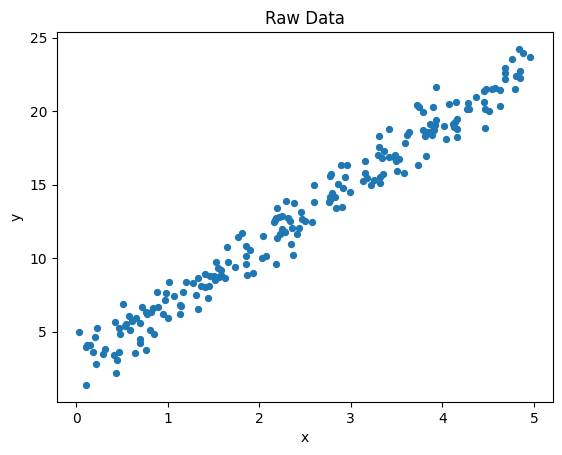

In [2]:
# 1) Plot: raw data
plt.figure()
plt.scatter(x, y, s=18)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Data")
plt.show()


In [3]:
# 2) Closed-form: compute θ using pseudo-inverse for stability
theta_ne = np.linalg.pinv(X.T @ X) @ (X.T @ y)   # or np.linalg.pinv(X) @ y with augmented X
intercept_ne, slope_ne = float(theta_ne[0]), float(theta_ne[1])


In [4]:
print(f"Closed-form → intercept = {intercept_ne:.6f}, slope = {slope_ne:.6f}")


Closed-form → intercept = 2.690841, slope = 4.131842


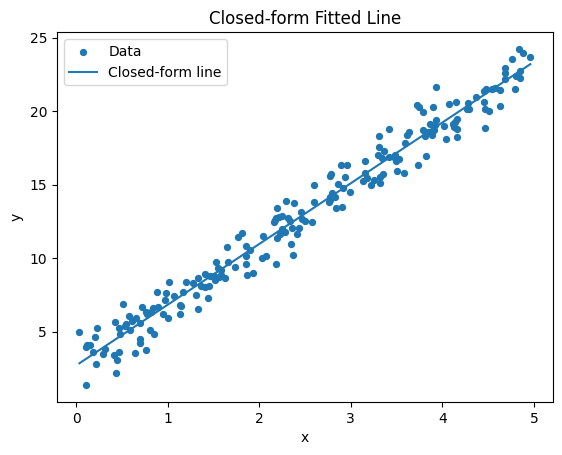

In [5]:
# 2) Plot: closed-form fitted line (over raw data for context)
x_line = np.linspace(x.min(), x.max(), 200)
y_ne_line = intercept_ne + slope_ne * x_line

plt.figure()
plt.scatter(x, y, s=18, label="Data")
plt.plot(x_line, y_ne_line, label="Closed-form line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Closed-form Fitted Line")
plt.legend()
plt.show()


In [6]:
# 3) Initialize θ and set learning rate
theta0 = np.zeros(2)   # [θ0, θ1] = [0, 0]
eta = 0.05


In [7]:
# 3) GD from scratch: helper functions + run
def mse(X, y, theta):
    r = X @ theta - y
    return float((r @ r) / X.shape[0])

def gradient(X, y, theta):
    # ∇θ J(θ) = (2/m) Xᵀ (Xθ − y)    from(hint)
    return (2.0 / X.shape[0]) * (X.T @ (X @ theta - y))

def gradient_descent(X, y, theta_init, eta=0.05, iters=1000):
    theta = theta_init.astype(float).copy()
    history = []
    for _ in range(iters):
        history.append(mse(X, y, theta))
        theta -= eta * gradient(X, y, theta)
    history.append(mse(X, y, theta))
    return theta, np.array(history)

theta_gd, losses = gradient_descent(X, y, theta0, eta=eta, iters=1000)
intercept_gd, slope_gd = float(theta_gd[0]), float(theta_gd[1])


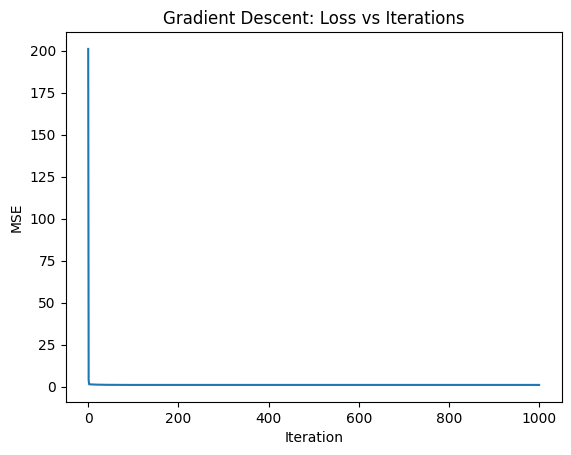

In [8]:
# 3) Plot: loss curve (MSE vs iterations)
plt.figure()
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent: Loss vs Iterations")
plt.show()


In [9]:
print(f"Gradient Descent → intercept = {intercept_gd:.6f}, slope = {slope_gd:.6f}")
print(f"Final MSE (GD) = {losses[-1]:.6f}")


Gradient Descent → intercept = 2.690841, slope = 4.131842
Final MSE (GD) = 0.995809


In [10]:
# 4) Compare parameter estimates and MSEs
mse_ne = mse(X, y, theta_ne)
mse_gd = mse(X, y, theta_gd)

print("Closed-form:", {"intercept": intercept_ne, "slope": slope_ne, "MSE": mse_ne})
print("Grad Descent:", {"intercept": intercept_gd, "slope": slope_gd, "MSE": mse_gd})
print("Absolute diffs:", {
    "Δintercept": abs(intercept_ne - intercept_gd),
    "Δslope": abs(slope_ne - slope_gd),
    "ΔMSE": abs(mse_ne - mse_gd),
})


Closed-form: {'intercept': 2.690841383464215, 'slope': 4.131841832861149, 'MSE': 0.9958085506981225}
Grad Descent: {'intercept': 2.69084138327786, 'slope': 4.131841832919722, 'MSE': 0.9958085506981227}
Absolute diffs: {'Δintercept': 1.8635493148622118e-10, 'Δslope': 5.857359042238386e-11, 'ΔMSE': 2.220446049250313e-16}


In [12]:
tol = 1e-3
converged = (abs(intercept_ne - intercept_gd) < tol) and (abs(slope_ne - slope_gd) < tol)
comment = (
    "Yes , GD converged to (numerically) the same solution as the Normal Equation."
    if converged else
    "Not exactly — small differences remain due to finite iterations / step size."
)
print(comment)


Yes , GD converged to (numerically) the same solution as the Normal Equation.


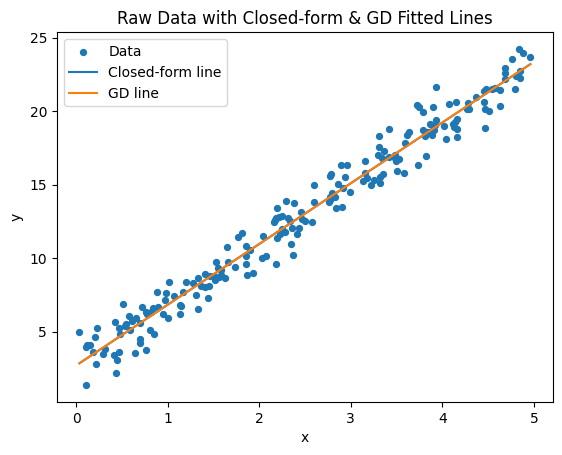

In [13]:
# Deliverables plot: raw data + both fitted lines in one figure
y_gd_line = intercept_gd + slope_gd * x_line

plt.figure()
plt.scatter(x, y, s=18, label="Data")
plt.plot(x_line, y_ne_line, label="Closed-form line")
plt.plot(x_line, y_gd_line, label="GD line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Data with Closed-form & GD Fitted Lines")
plt.legend()
plt.show()


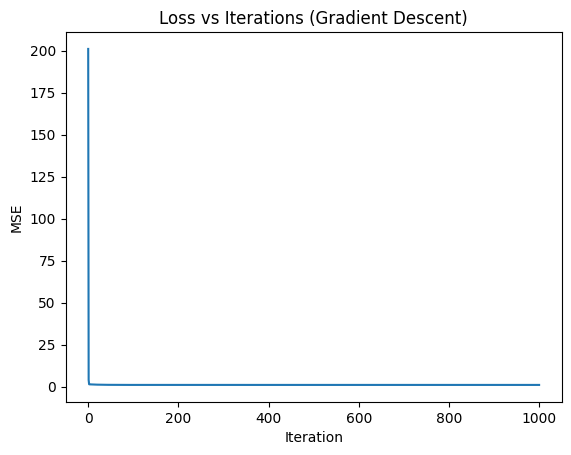

In [14]:
# Deliverables plot: loss curve (again, as explicitly requested)
plt.figure()
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss vs Iterations (Gradient Descent)")
plt.show()


In [15]:
# Verify bias column
print("First 5 rows of X (bias in col 0):\n", X[:5])
assert np.allclose(X[:5,0], 1.0), "Bias column is not all ones!"


First 5 rows of X (bias in col 0):
 [[1.         3.86978024]
 [1.         2.1943922 ]
 [1.         4.2929896 ]
 [1.         3.48684015]
 [1.         0.47088674]]


In [16]:
# Demonstrate same closed-form with np.dot
theta_ne_dot = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
print("Closed-form via np.dot matches:", np.allclose(theta_ne_dot, theta_ne))


Closed-form via np.dot matches: True


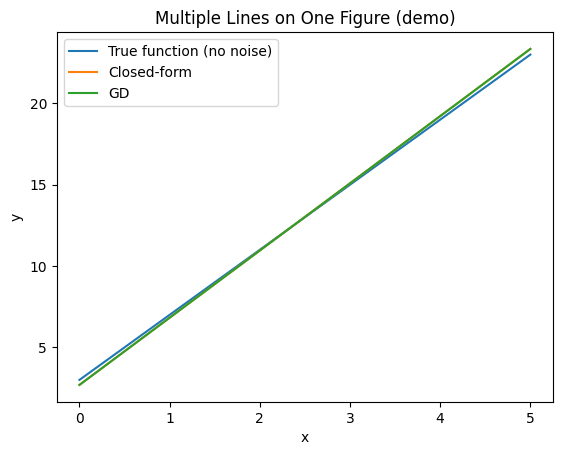

In [17]:
# Mini demonstration (uses plt.plot multiple times on one figure)
xx = np.linspace(0, 5, 50)
plt.figure()
plt.plot(xx, 3 + 4*xx, label="True function (no noise)")
plt.plot(xx, intercept_ne + slope_ne*xx, label="Closed-form")
plt.plot(xx, intercept_gd + slope_gd*xx, label="GD")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Multiple Lines on One Figure (demo)")
plt.legend()
plt.show()


## Both the Normal Equation and Gradient Descent recover virtually the same linear model on this synthetic dataset: their fitted lines overlap and the MSE values match within numerical tolerance. Any tiny difference is due to finite GD iterations and the chosen learning rate rather than model mismatch. The Normal Equation yields the exact least-squares solution for small problems, while Gradient Descent converges to the same solution with enough iterations and scales better to very large datasets.